In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## (a) RUL Calculation

In [2]:
df = pd.read_table("train.txt", header=None, sep=' ')
df = df.drop([26, 27], axis=1)
df.columns = ['unit number','time','operational setting1','operational setting2','operational setting3','sensor measurement 1','sensor measurement 2','sensor measurement 3','sensor measurement 4','sensor measurement 5','sensor measurement 6','sensor measurement 7','sensor measurement 8','sensor measurement 9','sensor measurement 10','sensor measurement 11','sensor measurement 12','sensor measurement 13','sensor measurement 14','sensor measurement 15','sensor measurement 16','sensor measurement 17','sensor measurement 18','sensor measurement 19','sensor measurement 20','sensor measurement 21']
df

,unit number,time,operational setting1,operational setting2,operational setting3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761


In [3]:
# 計算每個 unit number 的 max cycle
# use the max time (in cycles) minus the current time, and create the remain useful life column.

df_max_cycle = pd.DataFrame(df.groupby("unit number")["time"].max())
df_max_cycle.reset_index(level=0 , inplace=True)
df_max_cycle.columns = ['unit number', 'last_cycle']
df_max_cycle.describe()

,unit number,last_cycle
count,218.000000,218.000000
mean,109.500000,210.633028
std,63.075352,43.595578
min,1.000000,128.000000
25%,55.250000,177.000000
50%,109.500000,209.500000
75%,163.750000,236.000000
max,218.000000,357.000000


In [4]:
df = pd.merge(df, df_max_cycle, on="unit number")
df["RUL"] = df["last_cycle"] - df["time"]
df.drop(["last_cycle"], axis=1 , inplace=True)
df.head()

,unit number,time,operational setting1,operational setting2,operational setting3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21,RUL
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,222
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,221
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,220
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,219
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,218


In [5]:
df.shape

(45918, 27)

## (b) Variation Analysis

In [6]:
import numpy as np
import pandas as pd

#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [7]:
# Consider ‘unit number’ == 1 only

df_unit1_sensor = df[df['unit number']==1]
df_unit1_sensor = df_unit1_sensor.iloc[:,5:25]

In [8]:
#calculate CV for each column in data frame
df_unit1_sensor.apply(cv)

sensor measurement 1      5.382204
sensor measurement 2      6.387505
sensor measurement 3      7.566575
sensor measurement 4      9.949157
sensor measurement 5     44.734160
sensor measurement 6     46.964878
sensor measurement 7     52.815734
sensor measurement 8      7.150063
sensor measurement 9      4.003169
sensor measurement 10    11.755946
sensor measurement 11     8.016627
sensor measurement 12    52.914168
sensor measurement 13     6.251762
sensor measurement 14     1.144572
sensor measurement 15     8.579185
sensor measurement 16    20.018574
sensor measurement 17     8.107518
sensor measurement 18     7.154465
sensor measurement 19     6.251908
sensor measurement 20    48.158571
dtype: float64

# Answer

max coefficient of variation = sensor measurement 12<br> 
min coefficient of variation = sensor measurement 14<br>

變異係數是一種相對差異量數，用以比較單位不同或單位相同，但資料差異甚大的資料分散情形。<br>
可以看出 sensor measurement 14 的資料分散程度最小，sensor measurement 12 資料分散程度最大。

## (c) Feature Engineering

In [9]:
# A function to calculate moving average of the dataframe

def moving_average(df_sensor):
    # window is setting 11
    rolling = df_sensor.rolling(window=11)
    rolling_mean=rolling.mean()
    
    return rolling_mean

In [10]:
# A function to calculate moving variance of the dataframe

def moving_variance(df_sensor):
    # window is setting 11
    rolling = df_sensor.rolling(window=11)
    rolling_mean=rolling.var()
    
    return rolling_mean

In [11]:
# A function to calculate moving max of the dataframe

def moving_max(df_sensor):
    # window is setting 11
    rolling = df_sensor.rolling(window=11)
    rolling_mean=rolling.max()
    
    return rolling_mean

In [12]:
# Consider ‘unit number’ == 1 only
df_unit1_sensor = df[df['unit number']==1]
df_unit1_sensor_e = df[df['unit number']==1]
df_unit1_sensor = df_unit1_sensor.drop(columns='RUL')

for i in range(1,22):
    df_unit1_sensor['sensor measurement '+str(i)+' (MA)'] = moving_average(df_unit1_sensor['sensor measurement '+str(i)])
    df_unit1_sensor['sensor measurement '+str(i)+' (Max)'] = moving_max(df_unit1_sensor['sensor measurement '+str(i)])
    df_unit1_sensor['sensor measurement '+str(i)+' (Var)'] = moving_variance(df_unit1_sensor['sensor measurement '+str(i)])

# 刪除 nan 數值                                                                     
df_unit1_sensor.dropna(inplace=True)

In [13]:
df_unit1_sensor

,unit number,time,operational setting1,operational setting2,operational setting3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 18 (Var),sensor measurement 19 (MA),sensor measurement 19 (Max),sensor measurement 19 (Var),sensor measurement 20 (MA),sensor measurement 20 (Max),sensor measurement 20 (Var),sensor measurement 21 (MA),sensor measurement 21 (Max),sensor measurement 21 (Var)
10,1,11,25.0051,0.6200,80.0,462.54,537.41,1260.50,1051.56,7.05,...,18794.690909,98.63,100.0,20.64590,23.252727,38.99,139.383522,13.919482,23.3619,49.848220
11,1,12,35.0029,0.8413,60.0,449.44,555.85,1360.54,1130.69,5.48,...,18578.254545,98.63,100.0,20.64590,21.990000,38.99,142.123640,13.158145,23.3619,50.773899
12,1,13,42.0029,0.8409,40.0,445.00,549.91,1350.90,1123.53,3.91,...,16725.454545,98.63,100.0,20.64590,19.396364,38.99,119.118085,11.610536,23.2412,42.378800
13,1,14,25.0073,0.6203,80.0,462.54,537.22,1262.80,1051.01,7.05,...,26357.454545,97.26,100.0,37.16262,19.346364,38.99,119.647885,11.584436,23.2412,42.544488
14,1,15,9.9988,0.2500,20.0,489.05,604.63,1497.87,1302.51,10.52,...,26247.090909,97.26,100.0,37.16262,19.748182,38.99,125.909016,11.793282,23.2412,44.493973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,219,35.0073,0.8400,60.0,449.44,556.39,1381.50,1149.74,5.48,...,22968.690909,97.26,100.0,37.16262,18.171818,38.50,74.455096,10.865891,23.0440,27.041954
219,1,220,35.0027,0.8400,60.0,449.44,556.65,1375.43,1149.45,5.48,...,21481.563636,97.26,100.0,37.16262,16.931818,38.50,63.493496,10.119873,23.0440,23.038611
220,1,221,0.0008,0.0000,100.0,518.67,643.88,1593.26,1425.82,14.62,...,25072.563636,97.26,100.0,37.16262,19.114545,38.67,104.991507,11.405264,23.0440,37.714022
221,1,222,20.0003,0.7001,0.0,491.19,608.00,1494.99,1270.18,9.35,...,23092.054545,97.26,100.0,37.16262,17.821818,38.67,68.241856,10.634400,23.0218,24.512427


## (d) Feature Selection 1

In [14]:
df_unit1_RUL = df[df['unit number']==1]
df_unit1_RUL = df_unit1_RUL['RUL']
df_unit1_RUL_MA = moving_average(df_unit1_RUL)
df_unit1_RUL_MA.dropna(inplace=True)
df_unit1_RUL_MA

10     217.0
11     216.0
12     215.0
13     214.0
14     213.0
       ...  
218      9.0
219      8.0
220      7.0
221      6.0
222      5.0
Name: RUL, Length: 213, dtype: float64

In [15]:
df_unit1 = pd.concat([df_unit1_sensor,df_unit1_RUL_MA],axis=1)
df_unit1 = df_unit1.rename(columns={"RUL": "RUL(MA)"})

In [16]:
df_corr_=df_unit1.corr()
# get absolute value of correlation coefficients
df_corr_ = df_corr_.abs()
df_corr_[['RUL(MA)']]

,RUL(MA)
unit number,NaN
time,1.000000
operational setting1,0.070478
operational setting2,0.101048
operational setting3,0.084530
...,...
sensor measurement 20 (Var),0.288968
sensor measurement 21 (MA),0.221840
sensor measurement 21 (Max),0.112986
sensor measurement 21 (Var),0.290755


In [17]:
# identify the Top 10 features which have high absolute value of correlation coefficients with RUL.

df_corr_[['RUL(MA)']].sort_values(by=['RUL(MA)'], ascending=False).head(12)

,RUL(MA)
time,1.000000
RUL(MA),1.000000
sensor measurement 13 (Max),0.856633
sensor measurement 3 (Var),0.314183
sensor measurement 17 (Var),0.309982
sensor measurement 9 (Var),0.307249
sensor measurement 10 (Var),0.302611
sensor measurement 11 (Var),0.301589
sensor measurement 4 (Var),0.299526
sensor measurement 21 (Var),0.290755


# Answer

Top 10 correlation features<br>
sensor measurement 13 (Max)<br>
sensor measurement 3 (Var)<br>
sensor measurement 17 (Var)<br>
sensor measurement 9 (Var)<br>
sensor measurement 10 (Var)<br>
sensor measurement 11 (Var)<br>
sensor measurement 4 (Var)<br>
sensor measurement 21 (Var)<br>
sensor measurement 7 (Var)<br>
sensor measurement 12 (Var)<br>

## (e) Feature Selection 2

In [18]:
df_rf = df_unit1.drop(columns=['unit number','time','RUL(MA)'])
df_unit1_sensor_e["RUL"] = df_unit1_sensor_e["RUL"].tail(213)
df_rf = pd.concat([df_rf,df_unit1_sensor_e["RUL"]],axis=1)
df_rf.dropna(inplace=True)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [20]:
X = df_rf.iloc[:,:86]
y = df_rf.iloc[:,-1:]

In [21]:
# train the model
rf = RandomForestRegressor(random_state=42, n_estimators=1000)
rf = rf.fit(X, y)

In [22]:
# Get feature list
feature_list = list(X.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: sensor measurement 13 (Max) Importance: 0.69844
Variable: sensor measurement 12 (Max) Importance: 0.10454
Variable: sensor measurement 15 (Max) Importance: 0.05198
Variable: sensor measurement 21 (Max) Importance: 0.03828
Variable: sensor measurement 11 (Max) Importance: 0.03096
Variable: sensor measurement 14 (Max) Importance: 0.01467
Variable: sensor measurement 8 (Max) Importance: 0.00486
Variable: sensor measurement 4 (Max) Importance: 0.00483
Variable: sensor measurement 9 (Max) Importance: 0.00419
Variable: sensor measurement 10 (MA) Importance: 0.00298
Variable: sensor measurement 10 (Var) Importance: 0.0026
Variable: sensor measurement 14 (Var) Importance: 0.00241
Variable: sensor measurement 2 (MA) Importance: 0.00215
Variable: sensor measurement 20 (Max) Importance: 0.00214
Variable: sensor measurement 7 (Max) Importance: 0.00212
Variable: sensor measurement 15 (MA) Importance: 0.00194
Variable: sensor measurement 14 (MA) Importance: 0.00183
Variable: sensor measure

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [23]:
def plot_features_weights(model, weights, feature_names):
    
    (px, py) = (8, 10) 
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py))
    plt.xlabel(model)
    plt.gca().legend_ = None
    
    return W_df.tail(10)

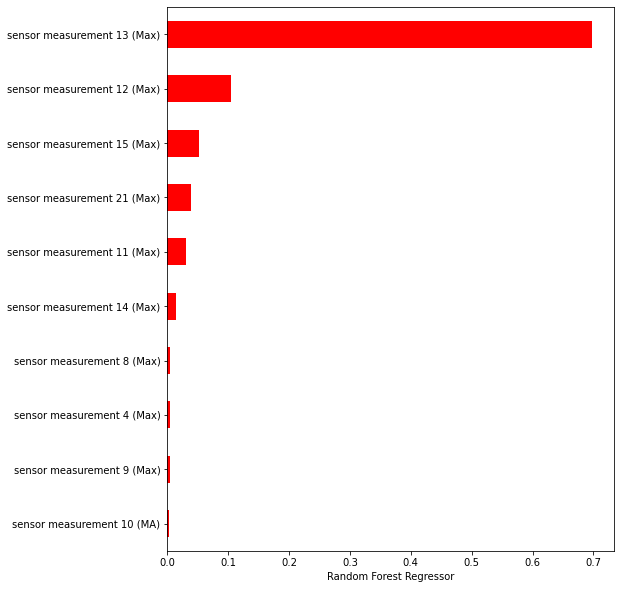

In [24]:
Top10_list = plot_features_weights('Random Forest Regressor', rf.feature_importances_, X.columns)

In [25]:
Top10_list = Top10_list.index.tolist()

In [26]:
Top10_list

['sensor measurement 10 (MA)',
 'sensor measurement 9 (Max)',
 'sensor measurement 4 (Max)',
 'sensor measurement 8 (Max)',
 'sensor measurement 14 (Max)',
 'sensor measurement 11 (Max)',
 'sensor measurement 21 (Max)',
 'sensor measurement 15 (Max)',
 'sensor measurement 12 (Max)',
 'sensor measurement 13 (Max)']

In [27]:
df_line_plot = pd.concat([X[Top10_list],df_unit1_sensor['time']],axis=1)
df_line_plot

,sensor measurement 10 (MA),sensor measurement 9 (Max),sensor measurement 4 (Max),sensor measurement 8 (Max),sensor measurement 14 (Max),sensor measurement 11 (Max),sensor measurement 21 (Max),sensor measurement 15 (Max),sensor measurement 12 (Max),sensor measurement 13 (Max),time
10,1.121818,9051.35,1407.59,2388.10,8133.29,47.50,23.3619,10.8941,521.81,2388.15,11
11,1.100000,9051.35,1407.59,2388.10,8133.29,47.50,23.3619,10.8941,521.81,2388.15,12
12,1.074545,9051.35,1407.59,2388.10,8133.29,47.50,23.2412,10.8941,521.74,2388.08,13
13,1.067273,9051.35,1407.59,2388.10,8133.29,47.50,23.2412,10.9160,521.74,2388.08,14
14,1.083636,9051.35,1407.59,2388.10,8133.29,47.50,23.2412,10.9160,521.74,2388.12,15
...,...,...,...,...,...,...,...,...,...,...,...
218,1.058182,9057.69,1427.66,2388.23,8134.63,48.04,23.0440,11.0199,520.08,2388.35,219
219,1.036364,9057.69,1427.66,2388.23,8134.63,48.04,23.0440,11.0199,520.08,2388.26,220
220,1.061818,9069.36,1427.66,2388.23,8139.03,48.17,23.0440,11.0199,520.08,2388.28,221
221,1.040909,9069.36,1425.82,2388.22,8139.03,48.17,23.0218,11.0199,520.04,2388.37,222


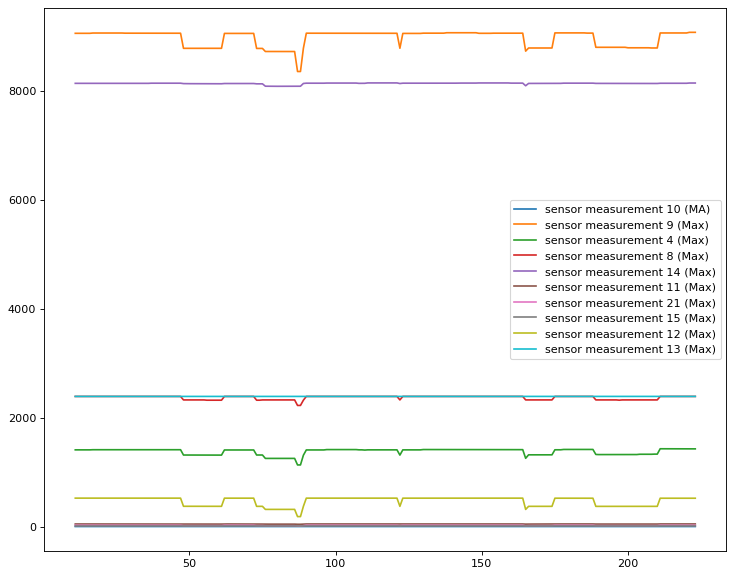

In [28]:
# importing package
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(11, 9), dpi=80)

# plot lines

for i in Top10_list:
    plt.plot(df_line_plot['time'].tolist(), df_line_plot[i].tolist(), label = i)
plt.legend()
plt.show()

# Ans

Top 10 random forest important features<br>
sensor measurement 13 (Max) Importance: 0.69844<br>
sensor measurement 12 (Max) Importance: 0.10454<br>
sensor measurement 15 (Max) Importance: 0.05198<br>
sensor measurement 21 (Max) Importance: 0.03828<br>
sensor measurement 11 (Max) Importance: 0.03096<br>
sensor measurement 14 (Max) Importance: 0.01467<br>
sensor measurement 8 (Max) Importance: 0.00486<br>
sensor measurement 4 (Max) Importance: 0.00483<br>
sensor measurement 9 (Max) Importance: 0.00419<br>
sensor measurement 10 (MA) Importance: 0.00298